## Task 2

# Task: Cuisine Combination
  
## Identify the most common combinations of cuisines in the dataset.

##  Determine if certain cuisine combinations tend to have higher ratings.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import seaborn as sns

# Load the data
df = pd.read_csv("D:\Alwin\Intership\Cognifyz\Intership_Resources\Dataset_copy.csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,Country,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Philippines,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Philippines,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Philippines,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Philippines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Philippines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Identify the most common combinations of cuisines in the dataset.

In [4]:
common_combination = df.groupby('Cuisines')['Aggregate rating'].count().sort_values(ascending=False).head(10)

print('The Top 10 common combination of Cuisines are:', common_combination, sep='\n')

The Top 10 common combination of Cuisines are:
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         355
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Aggregate rating, dtype: int64


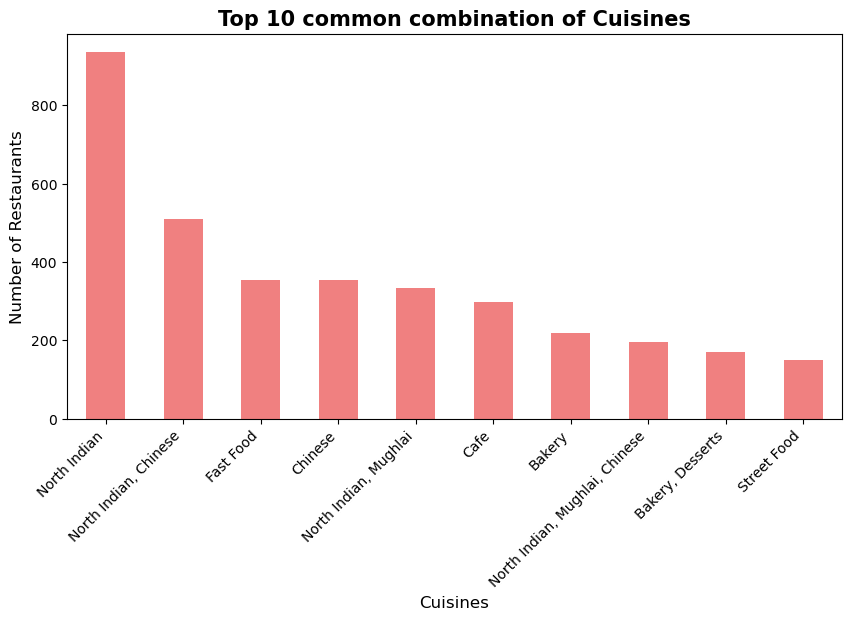

In [13]:
# Plot the data

plt.figure(figsize=(10, 5))
common_combination.plot(kind='bar', color='lightcoral')
plt.title('Top 10 common combination of Cuisines', fontsize=15, fontweight='bold')
plt.xlabel('Cuisines', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

##  Determine if certain cuisine combinations tend to have higher ratings.

In [6]:
# Select only relevant columns
relevant_data = df[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Votes']]

# Drop rows with missing cuisines and zero ratings
relevant_data = relevant_data.dropna(subset=['Cuisines', 'Aggregate rating'])
relevant_data = relevant_data[relevant_data['Aggregate rating'] > 0]

In [7]:
# Split cuisines into individual entries
relevant_data['Cuisine List'] = relevant_data['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',')])

In [8]:
# Generate all cuisine combinations for each restaurant
relevant_data['Cuisine Combinations'] = relevant_data['Cuisine List'].apply(lambda x: list(combinations(x, 2)))

combinations_with_ratings = []
for _, row in relevant_data.iterrows():
    for combo in row['Cuisine Combinations']:
        combinations_with_ratings.append((combo, row['Aggregate rating']))

In [9]:

# Create a DataFrame for analysis
combos_df = pd.DataFrame(combinations_with_ratings, columns=['Cuisine Combination', 'Rating'])

# Calculate Average Ratings per Combination
average_ratings = combos_df.groupby('Cuisine Combination').agg(
    Average_Rating=('Rating', 'mean'),
    Rating_Count=('Rating', 'size')
).reset_index()

In [10]:
# Filter for significant combinations (e.g., at least 10 ratings)
significant_combinations = average_ratings[average_ratings['Rating_Count'] >= 10]

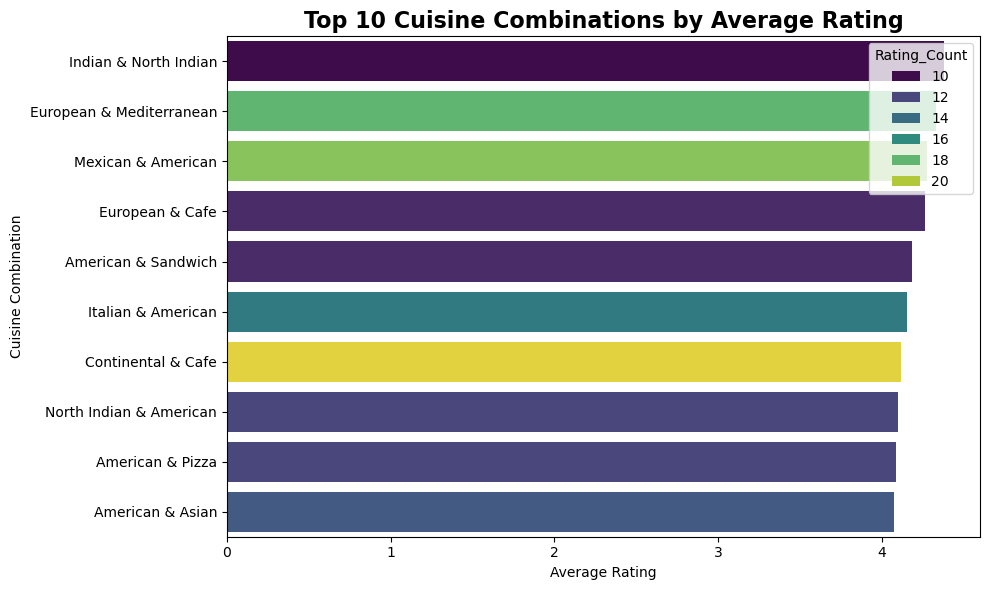

In [12]:
# Sort combinations by average rating
sorted_combinations = significant_combinations.sort_values(by='Average_Rating', ascending=False).head(10)

# Plot the top 10 combinations
plt.figure(figsize=(10, 6))
sns.barplot(
    y=sorted_combinations['Cuisine Combination'].apply(lambda x: ' & '.join(x)),
    x=sorted_combinations['Average_Rating'], 
    hue=sorted_combinations['Rating_Count'],
    palette='viridis'
)
plt.title('Top 10 Cuisine Combinations by Average Rating', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combination')
plt.tight_layout()
plt.show()